### If you roll two dice, how likely is it that your sum is greater than 7?

In [1]:
from random import choices
from collections import Counter

In [2]:
# Define a 6-sided die
faces = list(range(1, 7))
faces

[1, 2, 3, 4, 5, 6]

In [3]:
# A function for rolling a pair of dice
roll_2_dice = (lambda: choices(population=faces, weights=None, k=2))
pair = roll_2_dice()
pair

[4, 1]

In [4]:
sum(pair)

5

In [5]:
# Simulate rolling a pair many times and tracking the outcomes
rolls = [sum(roll_2_dice()) for _ in range(50_000)]
#print(rolls)

In [15]:
Counter?

Init signature: Counter(*args, **kwds)
Docstring:     
Dict subclass for counting hashable items.  Sometimes called a bag
or multiset.  Elements are stored as dictionary keys and their counts
are stored as dictionary values.

>>> c = Counter('abcdeabcdabcaba')  # count elements from a string

>>> c.most_common(3)                # three most common elements
[('a', 5), ('b', 4), ('c', 3)]
>>> sorted(c)                       # list all unique elements
['a', 'b', 'c', 'd', 'e']
>>> ''.join(sorted(c.elements()))   # list elements with repetitions
'aaaaabbbbcccdde'
>>> sum(c.values())                 # total of all counts
15

>>> c['a']                          # count of letter 'a'
5
>>> for elem in 'shazam':           # update counts from an iterable
...     c[elem] += 1                # by adding 1 to each element's count
>>> c['a']                          # now there are seven 'a'
7
>>> del c['b']                      # remove all 'b'
>>> c['b']                          # now there are 

In [13]:
# Count those outcomes (number of sums of paired elements)
rolls_counts = Counter(rolls)
print(rolls_counts) 

Counter({7: 8257, 8: 7004, 6: 6858, 5: 5633, 9: 5549, 4: 4251, 10: 4187, 11: 2762, 3: 2734, 12: 1437, 2: 1328})


In [19]:
# Sort by faces [0] or counts [1] and store the sorted results as a dictionary
rolls_counts = dict(sorted(rolls_counts.items(), key=lambda x: x[0], reverse=True))
print(rolls_counts)

{12: 1437, 11: 2762, 10: 4187, 9: 5549, 8: 7004, 7: 8257, 6: 6858, 5: 5633, 4: 4251, 3: 2734, 2: 1328}


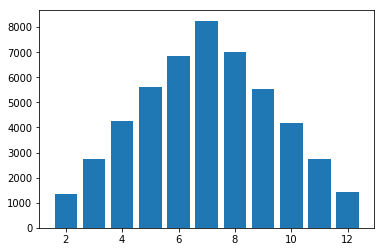

In [9]:
# Plot the outcome of simulating many dice rolling (Binomial Distribution)
import matplotlib.pyplot as plt
%matplotlib inline

labels, values = zip(*rolls_counts.items()) # Unpack dict
plt.bar(x=labels, height=values);

In [18]:
# If you roll two dice, how likely is it that your sum is greater than 7
sum(v for k, v in rolls_counts.items() if k > 7) / sum(rolls_counts.values())

0.41878

In [28]:
def duration(seconds):
    '''
    Encodes seconds into a formated string d:h:m:s.
    '''
    time = seconds
    day = time // (24 * 3600)
    time = time % (24 * 3600)
    hour = time // 3600
    time %= 3600
    minutes = time // 60
    time %= 60
    seconds = time
    print("d:h:m:s-> %d:%d:%d:%d" % (day, hour, minutes, seconds))

In [31]:
# If you roll seven dice, how likely is it that your sum is greater than 35?

import time
start = time.time()

faces = list(range(1, 7))
roll_7_dice = (lambda: choices(population=faces, weights=None, k=7))
rolls7 = [sum(roll_7_dice()) for _ in range(400_000_000)]
rolls_counts7 = Counter(rolls7)

likelihood = sum(v for k, v in rolls_counts7.items() if k > 35) / sum(rolls_counts7.values())
print("The likelihood is {}".format(likelihood))

duration(time.time() - start)

The likelihood is 0.0061038825
d:h:m:s-> 0:0:15:1


In [ ]:
from random import choices
from collections import Counter

# 6-sided die
faces = list(range(1, 7))

# A function for rolling a pair of dice
roll_2_dice = (lambda: choices(population=faces, weights=None, k=2))

# Simulate rolling a pair many times and tracking the outcomes
rolls = [sum(roll_2_dice()) for _ in range(50_000)]

# Count those outcomes
rolls_counts = Counter(rolls)

# If you roll two dice, how likely is it that your sum is greater than 7
sum(v for k, v in rolls_counts.items() if k > 7) / sum(rolls_counts.values())